In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MSFT.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [4]:
df.shape

(9083, 7)

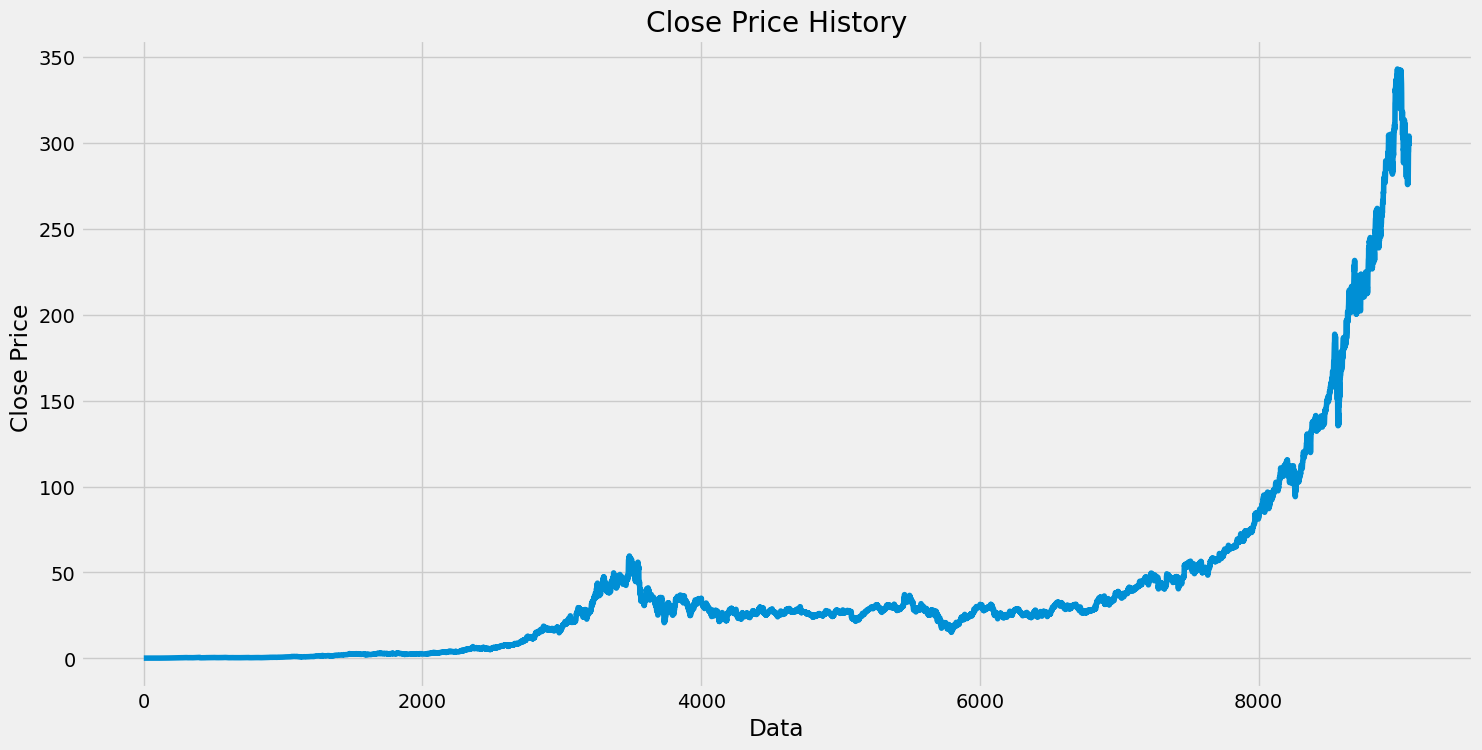

In [6]:
#Visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data')
plt.ylabel('Close Price ')
plt.show()

In [7]:
#create a new database with only required columns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

7267

In [8]:
#scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print('MEAN of the processed data: ', scaled_data.mean())
print('STD of the processed data: ', scaled_data.std())


MEAN of the processed data:  1.0013153162753806e-16
STD of the processed data:  1.0


In [10]:
#create the training data
#create scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i])

In [11]:
#convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60)

In [12]:
#reshape the data
print("x_train shape before reshaping", x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("x_train shape after reshaping", x_train.shape)
#

x_train shape before reshaping (7207, 60)
x_train shape after reshaping (7207, 60, 1)


In [15]:
#buil LSTM Model
model = Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [17]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 200)             │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 507,601 (1.94 MB)

 Trainable params: 507,601 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model


In [19]:
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - loss: 0.0109
Epoch 2/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 79s 332ms/step - loss: 2.4601e-04
Epoch 3/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 97s 399ms/step - loss: 1.9974e-04
Epoch 4/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 139s 384ms/step - loss: 1.9830e-04
Epoch 5/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 88s 388ms/step - loss: 1.7426e-04


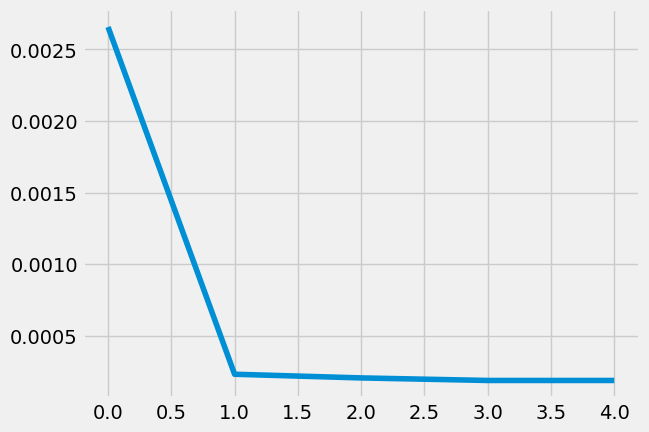

In [21]:
plt.plot(history.history['loss'])
plt.show()

In [22]:
#Create the testing dataset
#create new array
test_data=scaled_data[training_data_len-60:,:]
#create the x_test and y_tes
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [23]:
#conver the data to numpy
x_test=np.array(x_test)

In [24]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [25]:
#get the model predicted value
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step
[[ 45.34593 ]
 [ 45.399147]
 [ 45.548607]
 ...
 [242.95908 ]
 [245.96632 ]
 [247.87695 ]]
